# Importing necessary libraries

In [152]:
    #1.Pandas for dataframe
import pandas as pd

    #2. NumPy to peform Calculations
import numpy as np

    #3. Seaborn to Visualize data
import seaborn as sns
    # Setting dimensions for plot
sns.set(rc={'figure.figsize':(5.7,3.27)})

    #4. To split data
from sklearn.model_selection import train_test_split

    #5. For Linear Regression Model
from sklearn.linear_model import LinearRegression

    #6. For Random Forest Model
from sklearn.ensemble import RandomForestRegressor

    #7. For Evalaution Metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

    #8. For Plotting graph
import matplotlib.pyplot as plt

    #9. For Decision Tree Model
from sklearn.tree import DecisionTreeRegressor

    #10. To dump the model
import pickle

# Pre processing data

In [78]:
  #Importing Data:
data_house= pd.read_csv('/content/Delhi house data.csv')

  #Creating Copy:
df=data_house.copy()

  #Printing top 5 entries
print(df.head())

     Area  BHK  Bathroom      Furnishing  \
0 800.000    3     2.000  Semi-Furnished   
1 750.000    2     2.000  Semi-Furnished   
2 950.000    2     2.000       Furnished   
3 600.000    2     2.000  Semi-Furnished   
4 650.000    2     2.000  Semi-Furnished   

                                            Locality  Parking     Price  \
0                                   Rohini Sector 25    1.000   6500000   
1             J R Designers Floors, Rohini Sector 24    1.000   5000000   
2                Citizen Apartment, Rohini Sector 13    1.000  15500000   
3                                   Rohini Sector 24    1.000   4200000   
4  Rohini Sector 24 carpet area 650 sqft status R...    1.000   6200000   

          Status   Transaction           Type  Per_Sqft  
0  Ready_to_move  New_Property  Builder_Floor       NaN  
1  Ready_to_move  New_Property      Apartment  6667.000  
2  Ready_to_move        Resale      Apartment  6667.000  
3  Ready_to_move        Resale  Builder_Floor  6667.

In [79]:
  #Printing total NULL values of each column
print(df.isnull().sum())

Area             0
BHK              0
Bathroom         2
Furnishing       5
Locality         0
Parking         33
Price            0
Status           0
Transaction      0
Type             5
Per_Sqft       241
dtype: int64


In [80]:
  #Dropping Rows with NaN Values
df.dropna(axis=0, inplace=True)

  #Again printing total NULL values of each column
print(df.isnull().sum())

Area           0
BHK            0
Bathroom       0
Furnishing     0
Locality       0
Parking        0
Price          0
Status         0
Transaction    0
Type           0
Per_Sqft       0
dtype: int64


Removed all rows with null values

In [81]:
  # Structure of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1005 entries, 1 to 1258
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1005 non-null   float64
 1   BHK          1005 non-null   int64  
 2   Bathroom     1005 non-null   float64
 3   Furnishing   1005 non-null   object 
 4   Locality     1005 non-null   object 
 5   Parking      1005 non-null   float64
 6   Price        1005 non-null   int64  
 7   Status       1005 non-null   object 
 8   Transaction  1005 non-null   object 
 9   Type         1005 non-null   object 
 10  Per_Sqft     1005 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 94.2+ KB


In [82]:
  # Removing duplicate records
df.drop_duplicates(keep='first',inplace=True)

69 duplicate records dropped

In [83]:
  # Summarizing data
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df.describe()

,Area,BHK,Bathroom,Parking,Price,Per_Sqft
count,936.000,936.000,936.000,936.000,936.000,936.000
mean,1481.921,2.781,2.573,1.734,22032083.333,15790.613
std,1639.228,0.967,1.100,3.334,27276327.482,21807.250
min,28.000,1.000,1.000,1.000,1000000.000,1259.000
25%,750.000,2.000,2.000,1.000,5400000.000,6444.250
50%,1136.500,3.000,2.000,1.000,13750000.000,11111.000
75%,1700.000,3.000,3.000,2.000,27500000.000,18000.000
max,24300.000,7.000,7.000,39.000,240000000.000,183333.000


In [84]:
  # Dropping column not required for prediction
df=df.drop(columns=['Locality','Per_Sqft'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 936 entries, 1 to 1258
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         936 non-null    float64
 1   BHK          936 non-null    int64  
 2   Bathroom     936 non-null    float64
 3   Furnishing   936 non-null    object 
 4   Parking      936 non-null    float64
 5   Price        936 non-null    int64  
 6   Status       936 non-null    object 
 7   Transaction  936 non-null    object 
 8   Type         936 non-null    object 
dtypes: float64(3), int64(2), object(4)
memory usage: 73.1+ KB


2 columns dropped

# Dealing with column values

**Price**

In [85]:
  #Converting price value
df['Price']=df['Price']/100000
df.rename(columns={'Price': 'Price(in Lakhs)'}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 936 entries, 1 to 1258
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             936 non-null    float64
 1   BHK              936 non-null    int64  
 2   Bathroom         936 non-null    float64
 3   Furnishing       936 non-null    object 
 4   Parking          936 non-null    float64
 5   Price(in Lakhs)  936 non-null    float64
 6   Status           936 non-null    object 
 7   Transaction      936 non-null    object 
 8   Type             936 non-null    object 
dtypes: float64(4), int64(1), object(4)
memory usage: 73.1+ KB


**BHK**

<Axes: xlabel='BHK', ylabel='count'>

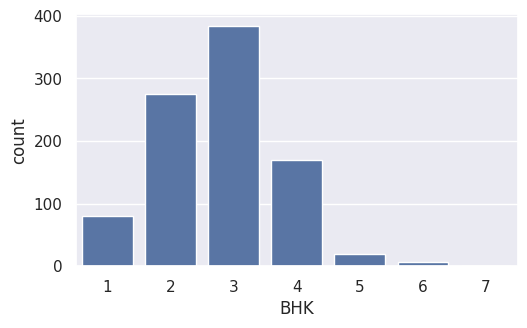

In [86]:
  #countplot
sns.countplot(x= 'BHK',data=df)

We observe that the BHK values ranges from 1 to 7

<Axes: xlabel='BHK', ylabel='Price(in Lakhs)'>

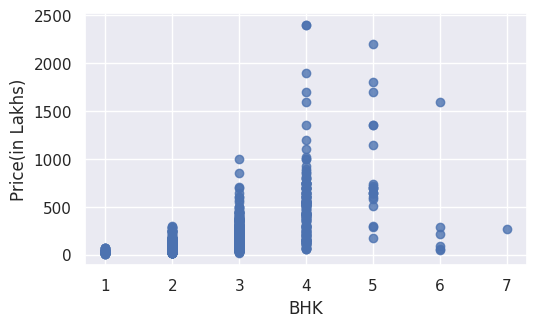

In [87]:
  #BHK vs Price
sns.regplot(x='BHK', y='Price(in Lakhs)', scatter=True,
            fit_reg=False, data=df)

BHK and Price value are not directly related, high price is offered for 4-5 BHK

**Area**

<Axes: xlabel='Area', ylabel='count'>

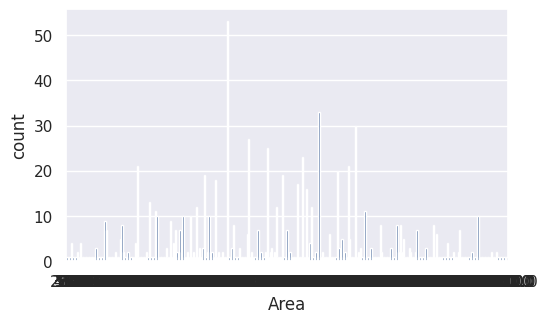

In [88]:
#Area vs Price
sns.countplot(x= 'Area', data=df)

We observe that we have diverse set of values for Aream column

<Axes: xlabel='Area', ylabel='Price(in Lakhs)'>

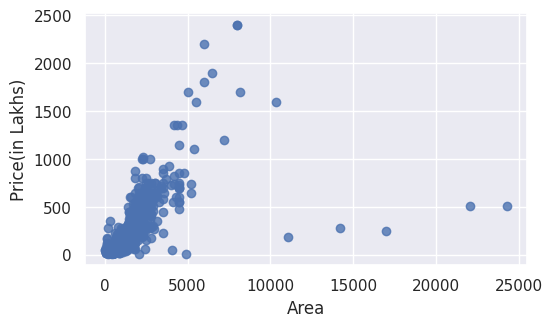

In [89]:
  #Area vs Price
sns.regplot(x='Area', y='Price(in Lakhs)', scatter=True,
            fit_reg=False, data=df)

**Bathroom**

In [ ]:
df['Bathroom'].unique()

array([2., 3., 4., 1., 5., 6., 7.])

In [92]:
df['Bathroom'] = df['Bathroom'].fillna(0).astype('int')
df['Bathroom'] = df['Bathroom'].astype('int')

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 936 entries, 1 to 1258
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             936 non-null    float64
 1   BHK              936 non-null    int64  
 2   Bathroom         936 non-null    int64  
 3   Furnishing       936 non-null    object 
 4   Parking          936 non-null    float64
 5   Price(in Lakhs)  936 non-null    float64
 6   Status           936 non-null    object 
 7   Transaction      936 non-null    object 
 8   Type             936 non-null    object 
dtypes: float64(3), int64(2), object(4)
memory usage: 73.1+ KB


Coverted Bathroom to int64 data type

<Axes: xlabel='Bathroom', ylabel='count'>

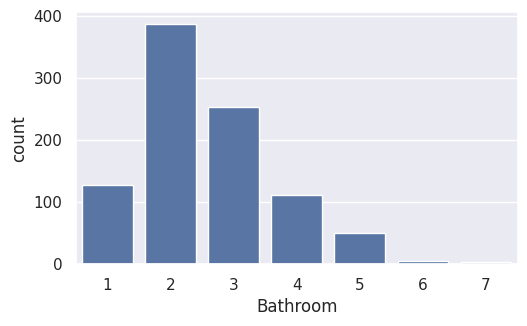

In [94]:
  #countplot
sns.countplot(x= 'Bathroom',data=df)

Value of Bathroom ranges from 1 to 7

<Axes: xlabel='Bathroom', ylabel='Price(in Lakhs)'>

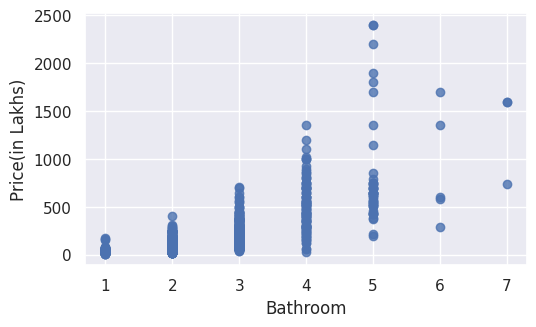

In [95]:
  #Bathroom vs Price
sns.regplot(x='Bathroom', y='Price(in Lakhs)', scatter=True,
            fit_reg=False, data=df)

Price is proportional to number of Bathrooms

**Parking**

In [96]:
df['Parking'].unique()

array([ 1.,  5.,  2.,  4.,  9.,  3., 39., 10.])

In [97]:
df['Parking'] = df['Parking'].astype('int')

<Axes: xlabel='Parking', ylabel='count'>

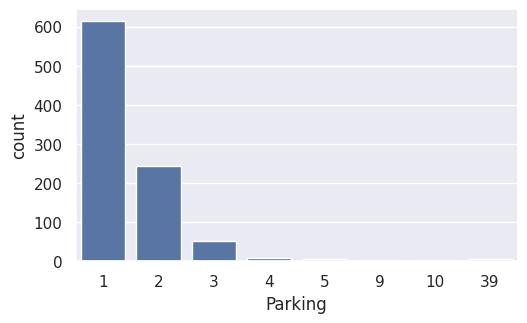

In [98]:
  #countplot
sns.countplot(x= 'Parking',data=df)

We observe that there are very few houses with parking above 5, so we can remove those values

In [99]:
df = df[(df.Parking <= 5)]

<Axes: xlabel='Parking', ylabel='count'>

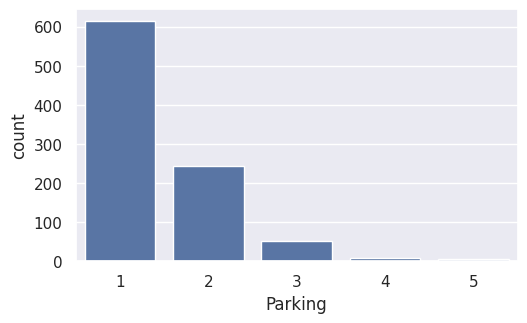

In [100]:
  #countplot
sns.countplot(x= 'Parking',data=df)

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 927 entries, 1 to 1258
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             927 non-null    float64
 1   BHK              927 non-null    int64  
 2   Bathroom         927 non-null    int64  
 3   Furnishing       927 non-null    object 
 4   Parking          927 non-null    int64  
 5   Price(in Lakhs)  927 non-null    float64
 6   Status           927 non-null    object 
 7   Transaction      927 non-null    object 
 8   Type             927 non-null    object 
dtypes: float64(2), int64(3), object(4)
memory usage: 72.4+ KB


<Axes: xlabel='Parking', ylabel='Price(in Lakhs)'>

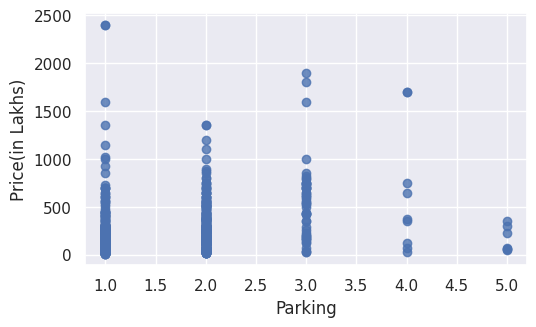

In [102]:
  #Parking vs Price
sns.regplot(x='Parking', y='Price(in Lakhs)', scatter=True,
            fit_reg=False, data=df)

**Furnishing**

<Axes: xlabel='Furnishing', ylabel='count'>

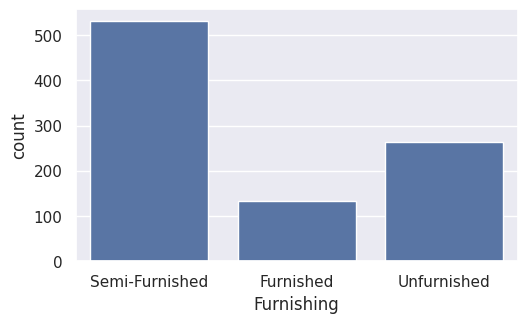

In [103]:
  #countplot
sns.countplot(x= 'Furnishing',data=df)

<Axes: xlabel='Furnishing', ylabel='Price(in Lakhs)'>

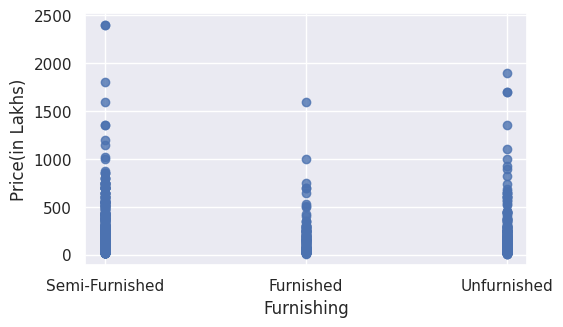

In [104]:
  #Furnishing vs Price
sns.regplot(x='Furnishing', y='Price(in Lakhs)', scatter=True,
            fit_reg=False, data=df)

We observe that furnishing doesn't affect price to a great extent, so we can ignore this column while prediction

**Status**

<Axes: xlabel='Status', ylabel='count'>

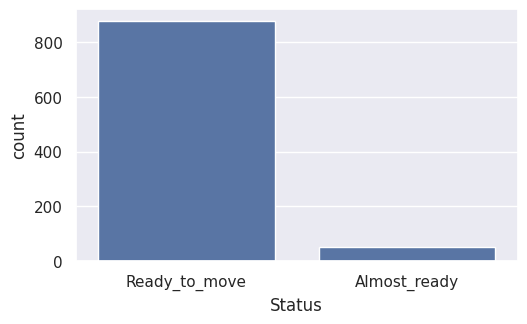

In [105]:
  #countplot
sns.countplot(x= 'Status',data=df)

<Axes: xlabel='Status', ylabel='Price(in Lakhs)'>

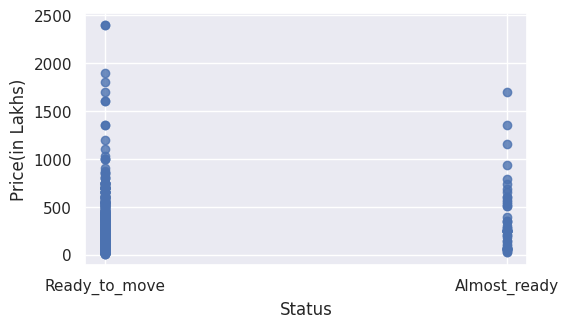

In [106]:
  #Staus vs Price
sns.regplot(x='Status', y='Price(in Lakhs)', scatter=True,
            fit_reg=False, data=df)

We observe that Ready to move house cost higher

In [107]:
# Converting object datatype to int (Ready_to_move=1, Almost_ready=0)
df['Status'] = df['Status'].apply(lambda x: 1 if x == "Ready_to_move" else 0)
df['Status'].unique()

array([1, 0])

<Axes: xlabel='Status', ylabel='Price(in Lakhs)'>

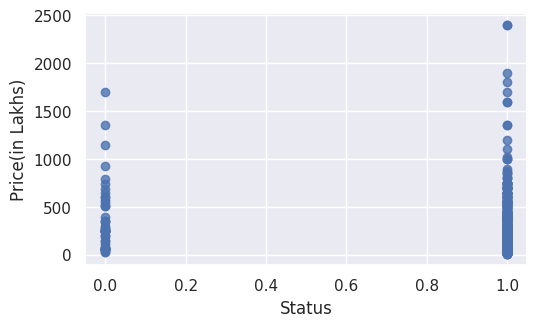

In [108]:
  #Staus vs Price
sns.regplot(x='Status', y='Price(in Lakhs)', scatter=True,
            fit_reg=False, data=df)

**Type**

<Axes: xlabel='Type', ylabel='count'>

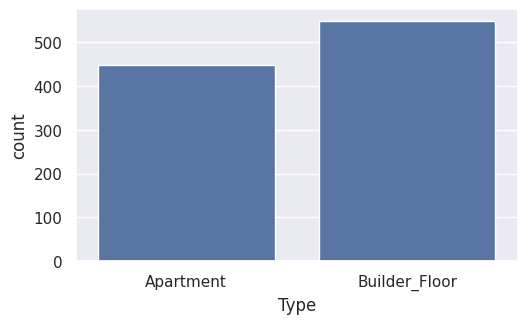

In [ ]:
  #countplot
sns.countplot(x= 'Type',data=df)

<Axes: xlabel='Type', ylabel='Price(in Lakhs)'>

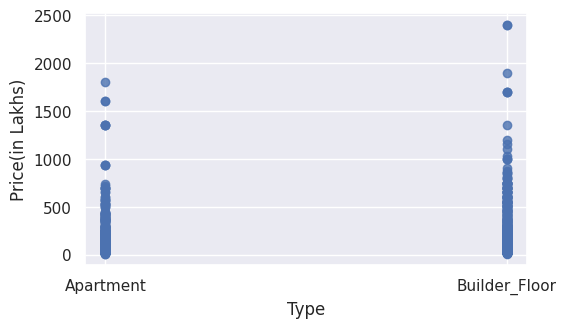

In [ ]:
  #Staus vs Price
sns.regplot(x='Type', y='Price(in Lakhs)', scatter=True,
            fit_reg=False, data=df)

We observe that Ready to move house cost higher

In [110]:
# Converting object datatype to int (Apartment=1, Builder_Floor=0)
df['Type'] = df['Type'].apply(lambda x: 1 if x == "Apartment" else 0)
df['Type'].unique()

array([1, 0])

**Transaction**

<Axes: xlabel='Transaction', ylabel='count'>

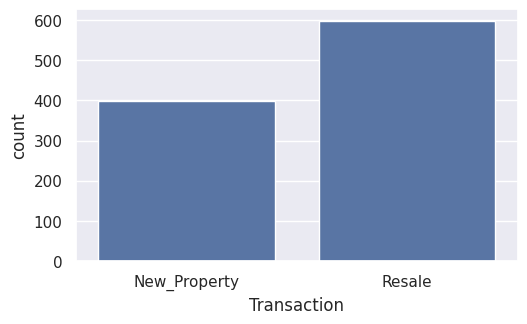

In [ ]:
  #countplot
sns.countplot(x= 'Transaction',data=df)

<Axes: xlabel='Transaction', ylabel='Price(in Lakhs)'>

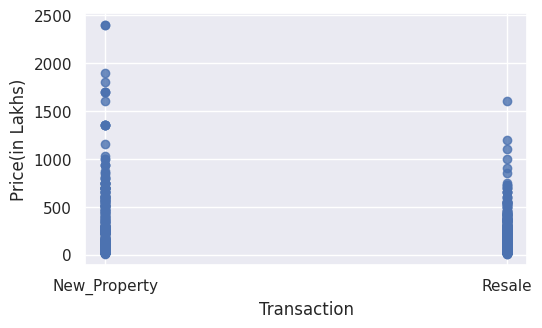

In [ ]:
  #Transaction vs Price
sns.regplot(x='Transaction', y='Price(in Lakhs)', scatter=True,
            fit_reg=False, data=df)

We observe that New_Property cost higher

In [111]:
# Converting object datatype to int (New_Property=1, Resale=0)
df['Transaction'] = df['Transaction'].apply(lambda x: 1 if x == "New_Property" else 0)
df['Transaction'].unique()

array([1, 0])

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 927 entries, 1 to 1258
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             927 non-null    float64
 1   BHK              927 non-null    int64  
 2   Bathroom         927 non-null    int64  
 3   Furnishing       927 non-null    object 
 4   Parking          927 non-null    int64  
 5   Price(in Lakhs)  927 non-null    float64
 6   Status           927 non-null    int64  
 7   Transaction      927 non-null    int64  
 8   Type             927 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 72.4+ KB


# Model Building

In [113]:
  # Correlation
df_select=df.select_dtypes(exclude=[object])
correlation=df_select.corr()
round(correlation,3)
df_select.corr().loc[:,'Price(in Lakhs)'].abs().sort_values(ascending=False)[1:]

Bathroom      0.740
BHK           0.593
Area          0.593
Parking       0.378
Transaction   0.210
Status        0.128
Type          0.102
Name: Price(in Lakhs), dtype: float64

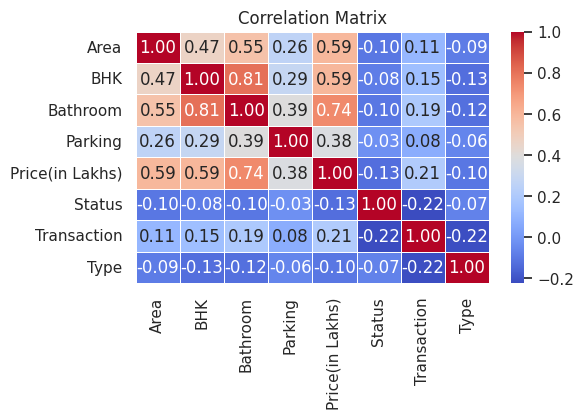

In [115]:
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [116]:
# Separating input and output feature
x = df_select.drop(['Price(in Lakhs)'], axis='columns', inplace=False)
y = df_select['Price(in Lakhs)']

In [117]:
# Splitting data into test and train
X_train1, X_test1, y_train1, y_test1 = train_test_split(x, y, test_size=0.3, random_state = 3)
print(X_train1.shape, X_test1.shape, y_train1.shape, y_test1.shape)

(648, 7) (279, 7) (648,) (279,)


**Linear Regression**

In [133]:
# LINEAR REGRESSION
lgr=LinearRegression(fit_intercept=True)
model_lin=lgr.fit(X_train1,y_train1)

In [134]:
# Predict the values on X_test_scaled dataset
y_predicted = model_lin.predict(X_test1)

In [135]:
# Calculate R2 Score
r2=r2_score(y_test1, y_predicted)
print("R2 Score:", r2)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test1, y_predicted)
print("Mean Absolute Error (MAE):", mae)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test1, y_predicted))
print("Root Mean Squared Error (RMSE):", rmse)

R2 Score: 0.4089633044557982
Mean Absolute Error (MAE): 110.77765171378763
Root Mean Squared Error (RMSE): 224.61801167310927


**Decision Tree**

In [144]:
reg=DecisionTreeRegressor(random_state = 0)
model_dtr=reg.fit(X_train1,y_train1)

In [145]:
# Predict the values on X_test_scaled dataset
y_predicted2= model_dtr.predict(X_test1)

In [146]:
# Calculate R2 Score
r2=r2_score(y_test1, y_predicted2)
print("R2 Score:", r2)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test1, y_predicted2)
print("Mean Absolute Error (MAE):", mae)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test1, y_predicted2))
print("Root Mean Squared Error (RMSE):", rmse)

R2 Score: 0.5691343697898192
Mean Absolute Error (MAE): 102.69181600955794
Root Mean Squared Error (RMSE): 191.78219361020422


**Random Forest**

In [147]:
regr=RandomForestRegressor(random_state = 0)
model_rfr=regr.fit(X_train1,y_train1)

In [149]:
# Predict the values on X_test_scaled dataset
y_predicted3= model_rfr.predict(X_test1)

In [150]:
# Calculate R2 Score
r2=r2_score(y_test1, y_predicted3)
print("R2 Score:", r2)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test1, y_predicted3)
print("Mean Absolute Error (MAE):", mae)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test1, y_predicted3))
print("Root Mean Squared Error (RMSE):", rmse)

R2 Score: 0.6726161909248336
Mean Absolute Error (MAE): 82.98914177127133
Root Mean Squared Error (RMSE): 167.1729300346046


# Conclusion

By observing evaluation metrices of Linear Regression, Decision Tree and Random Forest Model, we conclude that Random Forest Model performs better for this case study of house price prediction.

In [154]:
with open('model_rfr.pkl', 'wb') as file:
    pickle.dump(model_rfr, file)